In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv("/content/heart_2020_cleaned.csv")

In [127]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


diffWalking --- difficulty in walking

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [129]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [130]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [131]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

# Exploratory Data Analysis

In [15]:
df['HeartDisease']=df['HeartDisease'].replace({'No':int(0),'Yes':int(1)})

In [16]:
df.corr()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.051803,0.170721,0.028591,0.008327
BMI,0.051803,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.170721,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.028591,0.064131,0.287987,1.000000,-0.119717
SleepTime,0.008327,-0.051822,-0.061387,-0.119717,1.000000


In [17]:
corr_df=df.corr()['HeartDisease'].sort_values(ascending=True)

In [18]:
corr_df=corr_df.drop('HeartDisease',axis=0)

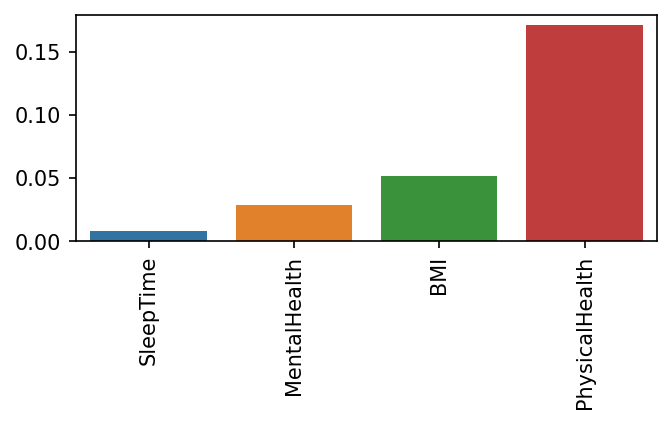

In [19]:
plt.figure(figsize=(5,2),dpi=150)
sns.barplot(x=corr_df.index,y=corr_df.values)
plt.xticks(rotation=90);

From the above graph we can say that Physical Health of a Person has a high correlation with Heart Disease (More the Physical Health Score More chances of the person getting the Heart Disease) while sleeptime, mental health, BMI have correlation less than or almost equal to 0.05 which can be considered as no correlation or very low correlation.

In [20]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [21]:
df_var=pd.get_dummies(df)

In [22]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   PhysicalHealth                       319795 non-null  float64
 3   MentalHealth                         319795 non-null  float64
 4   SleepTime                            319795 non-null  float64
 5   Smoking_No                           319795 non-null  uint8  
 6   Smoking_Yes                          319795 non-null  uint8  
 7   AlcoholDrinking_No                   319795 non-null  uint8  
 8   AlcoholDrinking_Yes                  319795 non-null  uint8  
 9   Stroke_No                            319795 non-null  uint8  
 10  Stroke_Yes                           319795 non-null  uint8  
 11  DiffWalking_N

In [23]:
corr_df_var=df_var.corr()['HeartDisease'].sort_values(ascending=True)

In [24]:
corr_df_var=corr_df_var.drop('HeartDisease',axis=0)

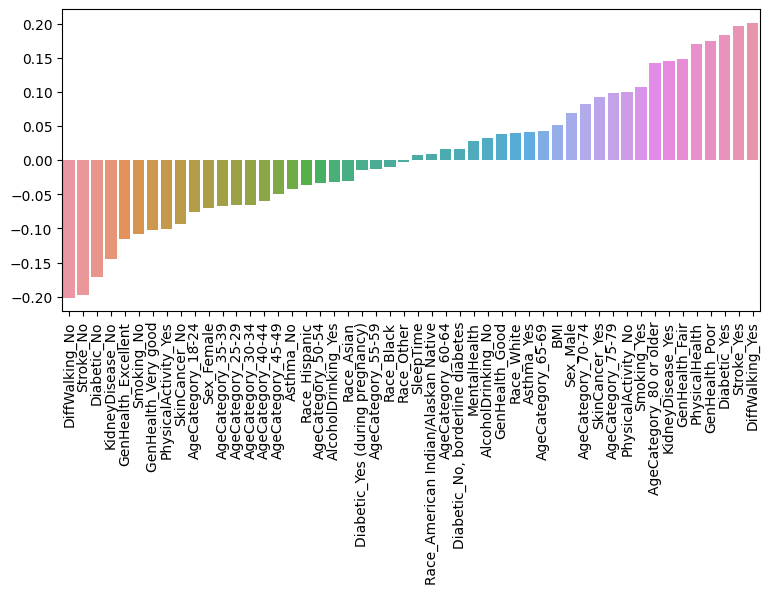

In [25]:
plt.figure(figsize=(9,4),dpi=100)
sns.barplot(x=corr_df_var.index,y=corr_df_var.values)
plt.xticks(rotation=90);

From this we can deduce that patients with
*   Difficulty in walking, 
*   Diabetes, 
* Low general Health,
*  Had a Stroke in the Past, 
* Kidney disease, 
* Smoking Habit, 
* No Physical Activity,
*  Have Skin Cancer,
*  or fall under the age category of 70+ 
 
have a high chance of having a Heart Disease.

In [134]:
X = pd.get_dummies(df.drop('HeartDisease',axis=1))

In [135]:
y=df['HeartDisease']

In [133]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler=StandardScaler()

In [137]:
scaled_X=scaler.fit_transform(X)

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca_model=PCA(n_components=2)

In [141]:
pca_results=pca_model.fit_transform(scaled_X)

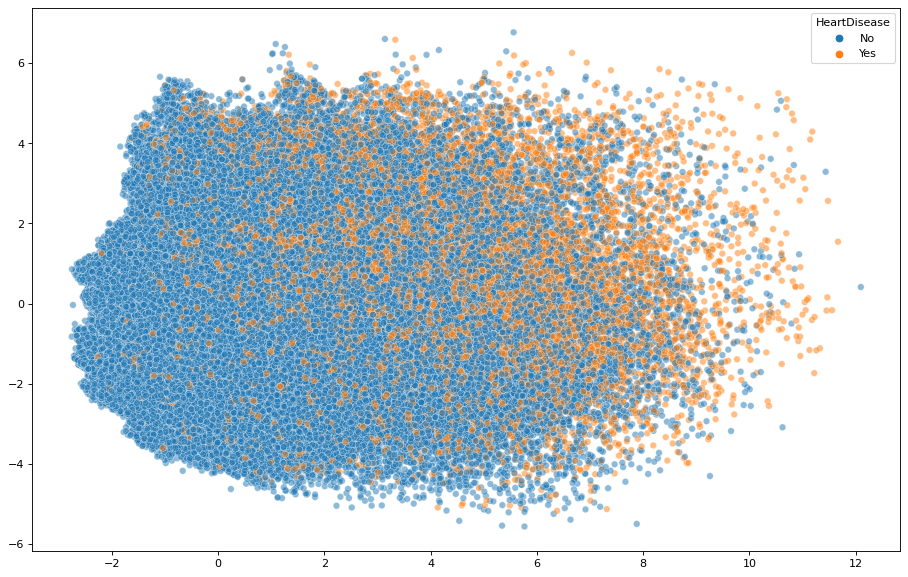

In [155]:
plt.figure(figsize=(14,9),dpi=80)
#plt.scatter(pca_results[:,0],pca_results[:,1],hue=y)
sns.scatterplot(x=pca_results[:,0],y=pca_results[:,1],hue=y,alpha=0.5)

Decreased the dataset to 2 components, so that we can visualize it and try to find any pattern.


From the above graph, we can say that both the people having disease and not having disease dont have a clear cut region as more than 95% of the points are overlapping.

# Data Preprocessing

In [26]:
df['HeartDisease']=df['HeartDisease'].replace({0:'No',1:'Yes'})

In [27]:
df.shape

(319795, 18)

In [28]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [29]:
X = pd.get_dummies(df.drop('HeartDisease',axis=1))

In [30]:
y=df['HeartDisease']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc_model = DecisionTreeClassifier()

In [ ]:
param_grid_dtc={'criterion':["gini", "entropy"],
            'max_depth':[x for x in range(5,17)],}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm_dtc=GridSearchCV(estimator=dtc_model,param_grid=param_grid_dtc)

In [ ]:
gm_dtc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16]})

In [ ]:
gm_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [ ]:
dtc_pred=gm_dtc.predict(X_test)

In [ ]:
dtc_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [ ]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96     87658
         Yes       0.54      0.05      0.09      8281

    accuracy                           0.91     95939
   macro avg       0.73      0.52      0.53     95939
weighted avg       0.89      0.91      0.88     95939



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


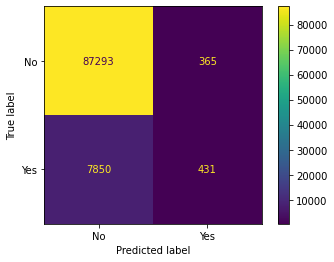

In [ ]:
plot_confusion_matrix(gm_dtc,X_test,y_test)

In [ ]:
(7850/len(df))*100 # ---> False Negative is 2 %

2.4546975406119547

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_rfc={'n_estimators':[64,100,128,200],
            'max_features':[10,25,30,45]}

In [ ]:
gm_rfc=GridSearchCV(rfc_model,param_grid_rfc)

In [ ]:
gm_rfc.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_param_grid={'n_estimators':[64,100,128,168,200,225,300],
            'max_features':[10,20,25,30,35,40,45],
            'max_depth':[None,6,9,15,20,25,30,35,40,45,49]};

In [ ]:
rm_rfc=RandomizedSearchCV(rfc_model,random_param_grid,n_iter=10,n_jobs=-1)

In [ ]:
rm_rfc.fit(X_train,y_train)

In [ ]:
gm_rfc.best_params_

{'max_features': 30, 'n_estimators': 200}

In [ ]:
rfc_pred=gm_rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95     87658
         Yes       0.37      0.13      0.20      8281

    accuracy                           0.91     95939
   macro avg       0.65      0.56      0.57     95939
weighted avg       0.87      0.91      0.88     95939



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


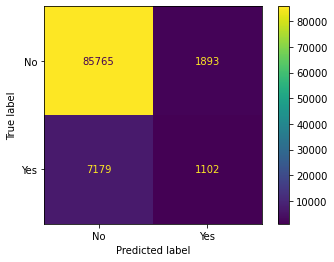

In [ ]:
plot_confusion_matrix(gm_rfc,X_test,y_test)

# Logistic Regression

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
scaled_X_train = scaler.fit_transform(X_train)

In [36]:
scaled_X_test=scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model = LogisticRegression()

In [39]:
lr_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [40]:
lr_pred=lr_model.predict(scaled_X_test)

In [41]:
lr_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [42]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [43]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

          No       0.92      0.99      0.96     87658
         Yes       0.55      0.10      0.18      8281

    accuracy                           0.92     95939
   macro avg       0.74      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


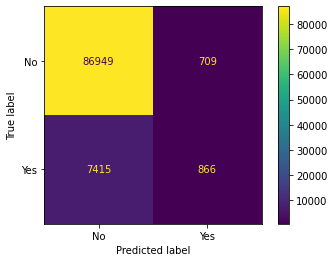

In [44]:
plot_confusion_matrix(lr_model,scaled_X_test,y_test)

# ML Algorithm Download

Using the Logistic regression model for the Website

Training the Logistic Regression model on full dataset

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()

In [68]:
scaled_X=scaler.fit_transform(X.values)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr_model_final=LogisticRegression()

In [71]:
lr_model_final.fit(scaled_X,y)

LogisticRegression()

In [58]:
import pickle

In [59]:
pickle.dump(lr_model_final,open('lr_model_final.pkl','wb'))